# Advanced Pandas
<sup>Created by Natawut Nupairoj, Department of Computer Engineering, Chulalongkorn University</sup>

Pandas is one of the most popular tools in Python for data analytics.  It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy.

In this tutorial, we will play with a dataset from kaggle to demonstrate Pandas' basic operations.  The dataset is [Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new).  For simplicity, we will work with only US dataset ([USvideos.csv](https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv) and [US_category_id.json](https://www.kaggle.com/datasnaek/youtube-new?select=US_category_id.json)).

We will continue our lessons for advanced pandas.  This includes data wrangling and groupby operations.

In [ ]:
import pandas as pd
import numpy as np

## Youtube Trending Data Exploration

### Downloading data files from shared drive (optional for Colab)

To simplify data retrieval process on Colab, we heck if we are in the Colab environment and download data files from a shared drive and save them in folder "data".

For those using jupyter notebook on the local computer, you can read data directly assuming you save data in the folder "data".

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !wget https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/data.tgz -O data.tgz
    !tar -xzvf data.tgz

--2022-01-10 12:34:45--  https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/data.tgz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/2110446_DataScience_2021s2/main/datasets/data.tgz [following]
--2022-01-10 12:34:45--  https://raw.githubusercontent.com/kaopanboonyuen/2110446_DataScience_2021s2/main/datasets/data.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45477462 (43M) [application/octet-stream]
Saving to: ‘data.tgz’

data.tgz            100%[===================>]  43.37M   270MB/s    in 0.2s    

2022-01-10 12:34:45 (270 MB/s) - ‘data.tgz

### Read input from a data file into dataframe

In [ ]:
vdo_df = pd.read_csv('data/USvideos.csv')

### Remove Duplicates

Dataframe may contain some duplicate rows.

In [ ]:
vdo_df.drop_duplicates(inplace=True)

In [ ]:
vdo_df.shape

(40901, 16)

### Additional Data Preparation

In [ ]:
vdo_df['trending_dt'] = pd.to_datetime(vdo_df.trending_date, format='%y.%d.%m', errors='ignore', utc=True)

# Advanced Pandas Operations
When we deal with complex data and analysis, we usually have to to perform data wrangling.  In addition, groupby operations are usually required.

## Data Wrangling
Data contained in pandas objects can be combined together in a number of ways:
- *pandas.merge* connects rows in DataFrames based on one or more keys.  This is similar to SQL *join* operations
- *pandas.concat* concatenates or 'stacks' together objects along an axis.

### How each category trending in term of number of videos?
To answer this question, we will need to get category information from *US_category_id.json* file.

In [ ]:
vdo_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_dt
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-14 00:00:00+00:00
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-14 00:00:00+00:00
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-14 00:00:00+00:00
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-14 00:00:00+00:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-14 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,2018-06-14 00:00:00+00:00
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,2018-06-14 00:00:00+00:00
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,2018-06-14 00:00:00+00:00
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,2018-06-14 00:00:00+00:00


In [ ]:
cat_df = pd.read_json('data/US_category_id.json')

In [ ]:
cat_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


US_category_id.json file seems to be more complicated than expected.  We will have to write a customized reader to get specific data from this json file.

In [ ]:
import json

In [ ]:
with open('data/US_category_id.json') as fd:
    cat = json.load(fd)

In [ ]:
cat

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation'}},
  {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles'}},
  {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music'}},
  {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Pet

Extract only the id and snippet->title to be used for mapping

In [ ]:
cat_list = []
for d in cat['items']:
    cat_list.append((int(d['id']), d['snippet']['title']))

In [ ]:
cat_list

[(1, 'Film & Animation'),
 (2, 'Autos & Vehicles'),
 (10, 'Music'),
 (15, 'Pets & Animals'),
 (17, 'Sports'),
 (18, 'Short Movies'),
 (19, 'Travel & Events'),
 (20, 'Gaming'),
 (21, 'Videoblogging'),
 (22, 'People & Blogs'),
 (23, 'Comedy'),
 (24, 'Entertainment'),
 (25, 'News & Politics'),
 (26, 'Howto & Style'),
 (27, 'Education'),
 (28, 'Science & Technology'),
 (29, 'Nonprofits & Activism'),
 (30, 'Movies'),
 (31, 'Anime/Animation'),
 (32, 'Action/Adventure'),
 (33, 'Classics'),
 (34, 'Comedy'),
 (35, 'Documentary'),
 (36, 'Drama'),
 (37, 'Family'),
 (38, 'Foreign'),
 (39, 'Horror'),
 (40, 'Sci-Fi/Fantasy'),
 (41, 'Thriller'),
 (42, 'Shorts'),
 (43, 'Shows'),
 (44, 'Trailers')]

We can create a new dataframe from a list (or dict, etc.)

In [ ]:
cat_df = pd.DataFrame(cat_list, columns=['id', 'category'])

In [ ]:
cat_df

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [ ]:
vdo_df_withcat = vdo_df.merge(cat_df, left_on='category_id', right_on='id')

In [ ]:
vdo_df_withcat.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'trending_dt', 'id',
       'category'],
      dtype='object')

In [ ]:
vdo_df_withcat[['title', 'category_id', 'category']]

,title,category_id,category
0,WE WANT TO TALK ABOUT OUR MARRIAGE,22,People & Blogs
1,Me-O Cats Commercial,22,People & Blogs
2,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",22,People & Blogs
3,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,22,People & Blogs
4,Wearing Online Dollar Store Makeup For A Week,22,People & Blogs
...,...,...,...
40896,Game of Zones - S5:E5: The Isle of Van Gundy,43,Shows
40897,Game of Zones - S5:E5: The Isle of Van Gundy,43,Shows
40898,Game of Zones - S5:E5: The Isle of Van Gundy,43,Shows
40899,Game of Zones - S5:E5: The Isle of Van Gundy,43,Shows


In [ ]:
vdo_df_withcat.category.value_counts()

Entertainment            9944
Music                    6467
Howto & Style            4142
Comedy                   3453
People & Blogs           3208
News & Politics          2485
Science & Technology     2397
Film & Animation         2343
Sports                   2172
Education                1655
Pets & Animals            920
Gaming                    816
Travel & Events           401
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category, dtype: int64

**Merge function arguments**
- **left** <BR> DataFrame to be merged on the left side.
- **right** <BR> DataFrame to be merged on the right side.
- **how** <BR> One of 'inner', 'outer', 'left', or 'right'; defaults to 'inner'.
- **on** <BR> Column names to join on. Must be found in both DataFrame objects. If not specified and no other join keys given, will use the intersection of the column names in left and right as the join keys.
- **left_on** <BR> Columns in left DataFrame to use as join keys.
- **right_on** <BR> Analogous to left_on for left DataFrame.
- **left_index** <BR> Use row index in left as its join key (or keys, if a MultiIndex).
- **right_index** <BR> Analogous to left_index.
- **sort** <BR> Sort merged data lexicographically by join keys; True by default (disable to get better performance in some cases on large datasets).
- **suffixes** <BR> Tuple of string values to append to column names in case of overlap; defaults to ('_x', '_y') (e.g., if 'data' in both DataFrame objects, would appear as 'data_x' and 'data_y' in result).
- **copy** <BR> If False, avoid copying data into resulting data structure in some exceptional cases; by default always copies.
- **indicator** <BR> Adds a special column _merge that indicates the source of each row; values will be 'left_only', 'right_only', or 'both' based on the origin of the joined data in each row.

In addition to merge function, we can also perform *concatenation* to combine 2 dataframes into one.  This is useful for merging other data.  For example, if we want to combine data from US and GB together, we can use concat.

In [ ]:
gb_vdo_df = pd.read_csv('data/GBvideos.csv')

In [ ]:
gb_vdo_df.shape

(38916, 16)

In [ ]:
vdo_df.shape

(40901, 17)

In [ ]:
pd.concat([vdo_df, gb_vdo_df], ignore_index=True, sort=True)

,category_id,channel_title,comment_count,comments_disabled,description,dislikes,likes,publish_time,ratings_disabled,tags,thumbnail_link,title,trending_date,trending_dt,video_error_or_removed,video_id,views
0,22,CaseyNeistat,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2966,57527,2017-11-13T17:13:01.000Z,False,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,WE WANT TO TALK ABOUT OUR MARRIAGE,17.14.11,2017-11-14 00:00:00+00:00,False,2kyS6SvSYSE,748374
1,24,LastWeekTonight,12703,False,"One year after the presidential election, John...",6146,97185,2017-11-13T07:30:00.000Z,False,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,The Trump Presidency: Last Week Tonight with J...,17.14.11,2017-11-14 00:00:00+00:00,False,1ZAPwfrtAFY,2418783
2,23,Rudy Mancuso,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,5339,146033,2017-11-12T19:05:24.000Z,False,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,"Racist Superman | Rudy Mancuso, King Bach & Le...",17.14.11,2017-11-14 00:00:00+00:00,False,5qpjK5DgCt4,3191434
3,24,Good Mythical Morning,2146,False,Today we find out if Link is a Nickelback amat...,666,10172,2017-11-13T11:00:04.000Z,False,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Nickelback Lyrics: Real or Fake?,17.14.11,2017-11-14 00:00:00+00:00,False,puqaWrEC7tY,343168
4,24,nigahiga,17518,False,I know it's been a while since we did this sho...,1989,132235,2017-11-12T18:01:41.000Z,False,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I Dare You: GOING BALD!?,17.14.11,2017-11-14 00:00:00+00:00,False,d380meD0W0M,2095731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79812,10,EnriqueIglesiasVEVO,9933,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,12783,268088,2018-05-09T07:00:01.000Z,False,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",https://i.ytimg.com/vi/l884wKofd54/default.jpg,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,18.14.06,NaT,False,l884wKofd54,25066952
79813,10,Jacob Sartorius,24330,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,13781,61998,2018-05-11T17:09:16.000Z,False,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,Jacob Sartorius - Up With It (Official Music V...,18.14.06,NaT,False,IP8k2xkhOdI,1492219
79814,10,Anne-Marie,19988,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,8892,394830,2018-05-08T11:05:08.000Z,False,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,Anne-Marie - 2002 [Official Video],18.14.06,NaT,False,Il-an3K9pjg,29641412
79815,24,Eurovision Song Contest,26766,False,Eleni Foureira represented Cyprus at the first...,45875,151870,2018-05-08T20:32:32.000Z,False,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,Eleni Foureira - Fuego - Cyprus - LIVE - First...,18.14.06,NaT,False,-DRsfNObKIQ,14317515


 **concat function arguments**

- **objs** <BR> List or dict of pandas objects to be concatenated; this is the only required argument
- **axis** <BR> Axis to concatenate along; defaults to 0 (along rows)
- **join** <BR> Either 'inner' or 'outer' ('outer' by default); whether to intersection (inner) or union (outer) together indexes along the other axes
- **join_axes** <BR> Specific indexes to use for the other n–1 axes instead of performing union/intersection logic
- **keys** <BR> Values to associate with objects being concatenated, forming a hierarchical index along the concatenation axis; can either be a list or array of arbitrary values, an array of tuples, or a list of arrays (if multiple-level arrays passed in levels)
- **levels** <BR> Specific indexes to use as hierarchical index level or levels if keys passed
- **names** <BR> Names for created hierarchical levels if keys and/or levels passed
- **verify_integrity** <BR> Check new axis in concatenated object for duplicates and raise exception if so; by default (False) allows duplicates
- **ignore_index** <BR> Do not preserve indexes along concatenation axis, instead producing a new range(total_length) index

##  Aggregation and Group Operations
Categorizing a dataset and applying a function to each group, whether an aggregation or transformation, is often a critical component of a data analysis workflow. After loading, merging, and preparing a dataset, you may need to compute group statistics or possibly pivot tables for reporting or visualization purposes. pandas provides a flexible groupby interface, enabling you to slice, dice, and summarize datasets in a natural way.

### Group Operation Mechanics
Group operations can be described using the concepts of *split-apply-combine*.
- **The first stage** - data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object.
- **The second stage** - a function is applied to each group, producing a new value.
- **The third stage** - the results of all those function applications are combined into a result object.

In [ ]:
vdo_df_groupby_cat = vdo_df_withcat.groupby('category')

In [ ]:
vdo_df_groupby_cat

In [ ]:
vdo_df_groupby_cat.views

In [ ]:
vdo_df_groupby_cat.views.sum()

category
Autos & Vehicles           520690717
Comedy                    5111266590
Education                 1180175828
Entertainment            20561101882
Film & Animation          7267792432
Gaming                    2127799781
Howto & Style             4071011870
Music                    40126286541
News & Politics           1473090484
Nonprofits & Activism      168941392
People & Blogs            4910004664
Pets & Animals             764651989
Science & Technology      3473462753
Shows                       51501058
Sports                    4403213872
Travel & Events            343100609
Name: views, dtype: int64

In [ ]:
vdo_df_groupby_cat.views.mean()

category
Autos & Vehicles         1.355965e+06
Comedy                   1.480239e+06
Education                7.130972e+05
Entertainment            2.067689e+06
Film & Animation         3.101917e+06
Gaming                   2.607598e+06
Howto & Style            9.828614e+05
Music                    6.204776e+06
News & Politics          5.927930e+05
Nonprofits & Activism    2.963884e+06
People & Blogs           1.530550e+06
Pets & Animals           8.311435e+05
Science & Technology     1.449088e+06
Shows                    9.035273e+05
Sports                   2.027262e+06
Travel & Events          8.556125e+05
Name: views, dtype: float64

In [ ]:
vdo_df_groupby_cat.views.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Autos & Vehicles,384.0,1.355965e+06,3.373464e+06,2860.0,104652.75,406278.0,1074284.25,25244097.0
Comedy,3453.0,1.480239e+06,2.010867e+06,1807.0,351261.00,976989.0,1876046.00,29178096.0
Education,1655.0,7.130972e+05,8.795104e+05,773.0,248987.50,419343.0,772510.00,7349435.0
Entertainment,9944.0,2.067689e+06,5.821201e+06,798.0,272989.75,733789.5,1732307.50,149376127.0
Film & Animation,2343.0,3.101917e+06,5.572027e+06,943.0,302744.50,1274578.0,3209526.50,54863912.0
Gaming,816.0,2.607598e+06,3.144565e+06,1237.0,530424.00,1488158.0,3202759.50,16935442.0
Howto & Style,4142.0,9.828614e+05,1.929645e+06,1107.0,215273.00,502356.0,1094834.75,54155921.0
Music,6467.0,6.204776e+06,1.546525e+07,1591.0,382560.00,1434324.0,4951623.50,225211923.0
News & Politics,2485.0,5.927930e+05,1.119342e+06,549.0,50735.00,244014.0,685434.00,10277358.0


### Accessing groups in groupby

In [ ]:
for name, group in vdo_df_groupby_cat:
    print(name)
    print('----')
    print(type(group))
    print(group.columns)

Autos & Vehicles
----
<class 'pandas.core.frame.DataFrame'>
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'trending_dt', 'id',
       'category'],
      dtype='object')
Comedy
----
<class 'pandas.core.frame.DataFrame'>
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'trending_dt', 'id',
       'category'],
      dtype='object')
Education
----
<class 'pandas.core.frame.DataFrame'>
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_

In [ ]:
vdo_df_groupby_cat.get_group('Comedy')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_dt,id,category
13152,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-14 00:00:00+00:00,23,Comedy
13153,ZAQs-ctOqXQ,17.14.11,One Change That Would Make Pacific Rim a Classic,Cracked,23,2017-11-12T17:00:05.000Z,"pacific rim|""pacific rim 2""|""pacific rim seque...",295639,8011,638,1256,https://i.ytimg.com/vi/ZAQs-ctOqXQ/default.jpg,False,False,False,"Pacific Rim was so good, we can’t believe they...",2017-11-14 00:00:00+00:00,23,Comedy
13154,lZ68j2J_GOM,17.14.11,Using Other People's Showers,Gus Johnson,23,2017-11-13T14:44:24.000Z,"using other peoples showers|""gus""|""gus shower""...",33980,4884,52,234,https://i.ytimg.com/vi/lZ68j2J_GOM/default.jpg,False,False,False,Why is it so hard to figure out other people's...,2017-11-14 00:00:00+00:00,23,Comedy
13155,dQvIbulWCM4,17.14.11,Celebrities on Thanksgiving 2017!,Niki and Gabi,23,2017-11-12T23:41:48.000Z,"niki and gabi|""nikiandgabibeauty""|""celebrities...",605932,38397,1387,3412,https://i.ytimg.com/vi/dQvIbulWCM4/default.jpg,False,False,False,Celebrities on Thanksgiving 2017!\nWhat if one...,2017-11-14 00:00:00+00:00,23,Comedy
13156,t4YAyT4ihIQ,17.14.11,Getting My Driver's License | Lele Pons,Lele Pons,23,2017-11-10T18:30:01.000Z,"getting my drivers license|""lele""|""pons""|""gett...",3358068,120876,8279,6408,https://i.ytimg.com/vi/t4YAyT4ihIQ/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ https://youtu.be/T8j...,2017-11-14 00:00:00+00:00,23,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,w8AJBlmLMZM,18.14.06,So This is Basically Fire Emblem,JelloApocalypse,23,2018-05-25T17:14:47.000Z,"Fire Emblem|""Lord""|""Shadows of Valentia""|""Echo...",1360154,75071,1414,7805,https://i.ytimg.com/vi/w8AJBlmLMZM/default.jpg,False,False,False,If you are looking for a very affordable and c...,2018-06-14 00:00:00+00:00,23,Comedy
16601,fYUXvrF85uQ,18.14.06,Guess the movie in 4 words! (YIAY #418),jacksfilms,23,2018-05-25T18:28:48.000Z,"Jacksfilms|""Jack Douglass""|""YGS""|""YGS 100""|""YG...",1369854,56557,1468,23044,https://i.ytimg.com/vi/fYUXvrF85uQ/default.jpg,False,False,False,Download War Robots 6v6 PvP game and get AWESO...,2018-06-14 00:00:00+00:00,23,Comedy
16602,p1jllz43xZE,18.14.06,Ellie Kemper and Mindy Kaling Reminisce About ...,Late Night with Seth Meyers,23,2018-05-25T11:00:05.000Z,"Late Night|""Seth Meyers""|""Ellie Kemper""|""Mindy...",661572,6374,477,502,https://i.ytimg.com/vi/p1jllz43xZE/default.jpg,False,False,False,Ellie Kemper and Mindy Kaling reminisce about ...,2018-06-14 00:00:00+00:00,23,Comedy
16603,JNyZ49q4vrU,18.14.06,Buying Used Things 2,Domics,23,2018-05-23T21:28:54.000Z,"domics|""animation""|""kijiji""|""nordvpn""|""buying""...",3388958,162795,3576,15424,https://i.ytimg.com/vi/JNyZ49q4vrU/default.jpg,False,False,False,Start protecting yourself on the web at https...,2018-06-14 00:00:00+00:00,23,Comedy


### Like statistics of “Music” category over time?

In [ ]:
music_cat = vdo_df_withcat[vdo_df_withcat.category == 'Music']

In [ ]:
music_groupby_trending_date = music_cat.groupby('trending_dt')

In [ ]:
music_groupby_trending_date

In [ ]:
music_count_bydate = music_groupby_trending_date.video_id.count()

In [ ]:
music_count_bydate

trending_dt
2017-11-14 00:00:00+00:00    45
2017-11-15 00:00:00+00:00    37
2017-11-16 00:00:00+00:00    29
2017-11-17 00:00:00+00:00    29
2017-11-18 00:00:00+00:00    34
                             ..
2018-06-10 00:00:00+00:00    51
2018-06-11 00:00:00+00:00    51
2018-06-12 00:00:00+00:00    50
2018-06-13 00:00:00+00:00    51
2018-06-14 00:00:00+00:00    49
Name: video_id, Length: 205, dtype: int64

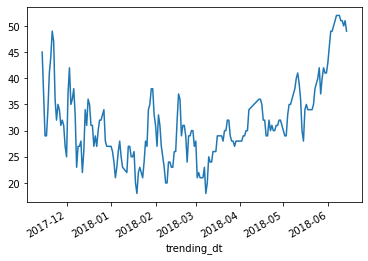

In [ ]:
music_count_bydate.plot()

In [ ]:
music_groupby_trending_date.likes.sum()

trending_dt
2017-11-14 00:00:00+00:00     4722174
2017-11-15 00:00:00+00:00     4170707
2017-11-16 00:00:00+00:00     4146265
2017-11-17 00:00:00+00:00     3363007
2017-11-18 00:00:00+00:00     4419657
                               ...   
2018-06-10 00:00:00+00:00    14986557
2018-06-11 00:00:00+00:00    15109828
2018-06-12 00:00:00+00:00    15583857
2018-06-13 00:00:00+00:00    16278888
2018-06-14 00:00:00+00:00    15954098
Name: likes, Length: 205, dtype: int64

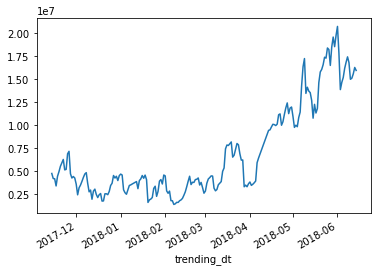

In [ ]:
music_groupby_trending_date.likes.sum().plot()